In [1]:
'''
## 문장
From now on, all responses will be provided from the perspective of an experienced developer, machine learning developer, or data scientist. 
If possible, could you also generate code in response to the questions? Would that be possible?
'''

'\n## 문장\nFrom now on, all responses will be provided from the perspective of an experienced developer, machine learning developer, or data scientist. \nIf possible, could you also generate code in response to the questions? Would that be possible?\n'

In [2]:
import pandas as pd

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

## Preprocessing

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [4]:
train_df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_df.describe()
# 자연상수로 표현되는 파처가 있음 -> describe 하나하나 출력

for idx in train_df:
    print(f'{idx} :','\n',train_df.describe()[idx])
    
# Y_Minimum, Y_Maximum, Sum_of_Luminosity => euler_col
# Log_Y_Index, Luminosity_Index => minus_col
# 전처리 필요함

id : 
 count    19219.000000
mean      9609.000000
std       5548.191747
min          0.000000
25%       4804.500000
50%       9609.000000
75%      14413.500000
max      19218.000000
Name: id, dtype: float64
X_Minimum : 
 count    19219.000000
mean       709.854675
std        531.544189
min          0.000000
25%         49.000000
50%        777.000000
75%       1152.000000
max       1705.000000
Name: X_Minimum, dtype: float64
X_Maximum : 
 count    19219.000000
mean       753.857641
std        499.836603
min          4.000000
25%        214.000000
50%        796.000000
75%       1165.000000
max       1713.000000
Name: X_Maximum, dtype: float64
Y_Minimum : 
 count    1.921900e+04
mean     1.849756e+06
std      1.903554e+06
min      6.712000e+03
25%      6.574680e+05
50%      1.398169e+06
75%      2.368032e+06
max      1.298766e+07
Name: Y_Minimum, dtype: float64
Y_Maximum : 
 count    1.921900e+04
mean     1.846605e+06
std      1.896295e+06
min      6.724000e+03
25%      6.575020e+05
50

In [6]:
# preprocessing euler_col
euler_col = ['Y_Minimum', 'Y_Maximum', 'Sum_of_Luminosity']

In [7]:
'''
### text
같은 데이터셋에는 자연상수 e를 사용하여 표현되는 feature가 존재합니다.
머신러닝 모델의 학습에 최적화된 피처로 전처리 하기 위해서는 어떤 전처리 과정을 사용하는 것이 가장 적절합니까?

## Question
In the same dataset, there are six features represented using the natural constant e.
To preprocess these features for optimal training of a machine learning model, what preprocessing steps would be most appropriate?
'''
from sklearn.preprocessing import MinMaxScaler
import numpy as np

combine = [train_df, test_df]
for idx in euler_col:
    for data in combine:
        # Assuming e_features is a numpy array representing the features using the natural constant e
        e_features = np.array(data[idx])

        # Initialize MinMaxScaler
        scaler = MinMaxScaler()

        # Reshape e_features to have multiple feature columns if necessary
        # num_feature => 1로 변경
        e_features = e_features.reshape(-1, 1)  # Replace num_features with the actual number of features

        # Fit scaler on e_features and transform it
        e_features_scaled = scaler.fit_transform(e_features)

        # Optionally, you can apply log transformation to the scaled features
        e_features_scaled_log = np.log(e_features_scaled + 1)  # Adding 1 to avoid log(0)

        data[idx] = e_features_scaled_log

        # Now e_features_scaled_log contains the preprocessed features ready for machine learning model training

   

In [8]:
# euler_col 처리여부 확인
for idx in euler_col:
    print(f'{idx} :','\n',train_df.describe()[idx])

for idx in euler_col:
    print(f'{idx} :','\n',test_df.describe()[idx])

Y_Minimum : 
 count    19219.000000
mean         0.125785
std          0.113683
min          0.000000
25%          0.048916
50%          0.101827
75%          0.167129
max          0.693147
Name: Y_Minimum, dtype: float64
Y_Maximum : 
 count    19219.000000
mean         0.125615
std          0.113353
min          0.000000
25%          0.048917
50%          0.101827
75%          0.166768
max          0.693147
Name: Y_Maximum, dtype: float64
Sum_of_Luminosity : 
 count    19219.000000
mean         0.015772
std          0.034341
min          0.000000
25%          0.000828
50%          0.001551
75%          0.005826
max          0.693147
Name: Sum_of_Luminosity, dtype: float64
Y_Minimum : 
 count    12814.000000
mean         0.125471
std          0.114466
min          0.000000
25%          0.047646
50%          0.100485
75%          0.167129
max          0.693147
Name: Y_Minimum, dtype: float64
Y_Maximum : 
 count    12814.000000
mean         0.125196
std          0.114230
min          0.0

In [9]:
# Log_Y_Index, Luminosity_Index => minus_col
minus_col = ['Log_Y_Index','Luminosity_Index']

In [10]:
'''
### text
동일한 데이터셋에는 음수의 값을 가지는 피처가 몇가지 존재합니다.
두 피처 모두 1과 -1 사이의 값을 가지며, 이 피처들을 머신러닝 학습에 최적화 되도록 전처리 하고자 합니다.
데이터의 전처리 방식 중 어떠한 방식이 해당 피처들의 전처리에 가장 적절합니까?

## Question
In the same dataset, there are several features with negative values.
Both features have values between 1 and -1, and I want to preprocess these features to be optimized for machine learning training.
Among the various preprocessing methods, which method would be most appropriate for preprocessing these features?
'''
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

# Assuming 'feature_1' and 'feature_2' are numpy arrays containing the features with negative values
combine = [train_df, test_df]
for data in combine:
    feature_1 = np.array(data['Log_Y_Index'])
    feature_2 = np.array(data['Luminosity_Index'])

    # Initialize MinMaxScaler for Min-Max scaling
    scaler_minmax = MinMaxScaler()

    # Fit and transform the features using Min-Max scaling
    feature_1_scaled_minmax = scaler_minmax.fit_transform(feature_1.reshape(-1, 1))
    feature_2_scaled_minmax = scaler_minmax.fit_transform(feature_2.reshape(-1, 1))

    # Initialize StandardScaler for normalization
    scaler_standard = StandardScaler()

    # Fit and transform the features using normalization
    data['Log_Y_Index'] = scaler_standard.fit_transform(feature_1.reshape(-1, 1))
    data['Luminosity_Index'] = scaler_standard.fit_transform(feature_2.reshape(-1, 1))


In [11]:
minus_col = ['Log_Y_Index','Luminosity_Index']
for idx in minus_col:
    print(f'{idx} :','\n',train_df.describe()[idx])
    print(f'{idx} :','\n',test_df.describe()[idx])

Log_Y_Index : 
 count    1.921900e+04
mean     6.946822e-16
std      1.000026e+00
min     -3.426890e+00
25%     -7.657385e-01
50%     -1.665356e-01
75%      7.838052e-01
max      6.518646e+00
Name: Log_Y_Index, dtype: float64
Log_Y_Index : 
 count    1.281400e+04
mean     6.099555e-17
std      1.000039e+00
min     -2.706233e+00
25%     -7.690110e-01
50%     -1.640958e-01
75%      7.953047e-01
max      7.145918e+00
Name: Log_Y_Index, dtype: float64
Luminosity_Index : 
 count    1.921900e+04
mean     2.033397e-18
std      1.000026e+00
min     -6.204195e+00
25%     -4.497077e-01
50%     -3.505221e-02
75%      4.518979e-01
max      6.485592e+00
Name: Luminosity_Index, dtype: float64
Luminosity_Index : 
 count    1.281400e+04
mean    -5.434149e-17
std      1.000039e+00
min     -7.290708e+00
25%     -4.503459e-01
50%     -3.719239e-02
75%      4.684328e-01
max      6.203376e+00
Name: Luminosity_Index, dtype: float64


In [12]:
# 자연상수 e가 나오는 이유로, 위에서 쓴 코드 재활용
combine = [train_df, test_df]
for idx in minus_col:
    for data in combine:
        # Assuming e_features is a numpy array representing the features using the natural constant e
        e_features = np.array(data[idx])

        # Initialize MinMaxScaler
        scaler = MinMaxScaler()

        # Reshape e_features to have multiple feature columns if necessary
        # num_feature => 1로 변경
        e_features = e_features.reshape(-1, 1)  # Replace num_features with the actual number of features

        # Fit scaler on e_features and transform it
        e_features_scaled = scaler.fit_transform(e_features)

        # Optionally, you can apply log transformation to the scaled features
        e_features_scaled_log = np.log(e_features_scaled + 1)  # Adding 1 to avoid log(0)

        data[idx] = e_features_scaled_log

In [13]:
for idx in minus_col:
    print(f'{idx} :','\n',train_df.describe()[idx])
    print(f'{idx} :','\n',test_df.describe()[idx])

Log_Y_Index : 
 count    19219.000000
mean         0.293308
std          0.074165
min          0.000000
25%          0.237104
50%          0.283539
75%          0.353031
max          0.693147
Name: Log_Y_Index, dtype: float64
Log_Y_Index : 
 count    12814.000000
mean         0.239571
std          0.078875
min          0.000000
25%          0.179509
50%          0.229546
75%          0.304103
max          0.693147
Name: Log_Y_Index, dtype: float64
Luminosity_Index : 
 count    19219.000000
mean         0.396666
std          0.052430
min          0.000000
25%          0.373956
50%          0.396189
75%          0.421682
max          0.693147
Name: Luminosity_Index, dtype: float64
Luminosity_Index : 
 count    12814.000000
mean         0.430824
std          0.047823
min          0.000000
25%          0.410065
50%          0.430179
75%          0.454257
max          0.693147
Name: Luminosity_Index, dtype: float64


In [14]:
for idx in train_df:
    print(f'{idx} :','\n',train_df.describe()[idx])

id : 
 count    19219.000000
mean      9609.000000
std       5548.191747
min          0.000000
25%       4804.500000
50%       9609.000000
75%      14413.500000
max      19218.000000
Name: id, dtype: float64
X_Minimum : 
 count    19219.000000
mean       709.854675
std        531.544189
min          0.000000
25%         49.000000
50%        777.000000
75%       1152.000000
max       1705.000000
Name: X_Minimum, dtype: float64
X_Maximum : 
 count    19219.000000
mean       753.857641
std        499.836603
min          4.000000
25%        214.000000
50%        796.000000
75%       1165.000000
max       1713.000000
Name: X_Maximum, dtype: float64
Y_Minimum : 
 count    19219.000000
mean         0.125785
std          0.113683
min          0.000000
25%          0.048916
50%          0.101827
75%          0.167129
max          0.693147
Name: Y_Minimum, dtype: float64
Y_Maximum : 
 count    19219.000000
mean         0.125615
std          0.113353
min          0.000000
25%          0.048917
50

In [15]:
'''
### text
같은 데이터셋에 최소값이 0, 최대값이 1705이며 평균이 709.854675, 표준편차는 531.544189인 특징을 가지는 "X_Minimum" 피처가 존재합니다.
머신러닝 학습에 가장 적합한 데이터로 변환하기 위해 전처리를 진행하려고 합니다.
어떤 전처리 방식이 해당 피처에 가장 적합한 전처리 방식입니까?

## Question
In the same dataset, there exists a feature named "X_Minimum" with a minimum value of 0, a maximum value of 1705, a mean of 709.854675, and a standard deviation of 531.544189.
I want to preprocess it to transform it into the most suitable data for machine learning training.
What preprocessing method would be most appropriate for this feature?
'''


from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

combine = [train_df, test_df]
for data in combine:
    # Assuming 'X_Minimum' is a numpy array containing the feature values
    X_Minimum = np.array([data['X_Minimum']])

    # Initialize MinMaxScaler for Min-Max scaling
    scaler_minmax = MinMaxScaler()

    # Fit and transform the 'X_Minimum' feature using Min-Max scaling
    X_Minimum_scaled_minmax = scaler_minmax.fit_transform(X_Minimum.reshape(-1, 1))

    # Initialize StandardScaler for standardization
    scaler_standard = StandardScaler()

    # Fit and transform the 'X_Minimum' feature using standardization
    X_Minimum_scaled_standard = scaler_standard.fit_transform(X_Minimum.reshape(-1, 1))
    data['X_Minimum'] = X_Minimum_scaled_standard

In [16]:
train_df.describe()['X_Minimum']
test_df.describe()['X_Minimum']

count    1.281400e+04
mean    -1.075740e-16
std      1.000039e+00
min     -1.333686e+00
25%     -1.247197e+00
50%      1.253505e-01
75%      8.323065e-01
max      1.840095e+00
Name: X_Minimum, dtype: float64

In [17]:
# 자연상수 e의 문제로 위의 코드 재활용함
combine = [train_df, test_df]
for data in combine:
    e_features = np.array(data['X_Minimum'])

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Reshape e_features to have multiple feature columns if necessary
    # num_feature => 1로 변경
    e_features = e_features.reshape(-1, 1)  # Replace num_features with the actual number of features

    # Fit scaler on e_features and transform it
    e_features_scaled = scaler.fit_transform(e_features)

    # Optionally, you can apply log transformation to the scaled features
    e_features_scaled_log = np.log(e_features_scaled + 1)  # Adding 1 to avoid log(0)

    data['X_Minimum'] = e_features_scaled_log

In [18]:
test_df.describe()['X_Minimum']

count    12814.000000
mean         0.325194
std          0.228732
min          0.000000
25%          0.026886
50%          0.378242
75%          0.520260
max          0.693147
Name: X_Minimum, dtype: float64

In [19]:
# X_Maximum 도 같은 방식으로 전처리 진행

combine = [train_df, test_df]
for data in combine:
    # Assuming 'X_Minimum' is a numpy array containing the feature values
    X_Minimum = np.array([data['X_Maximum']])

    # Initialize MinMaxScaler for Min-Max scaling
    scaler_minmax = MinMaxScaler()

    # Fit and transform the 'X_Minimum' feature using Min-Max scaling
    X_Minimum_scaled_minmax = scaler_minmax.fit_transform(X_Minimum.reshape(-1, 1))

    # Initialize StandardScaler for standardization
    scaler_standard = StandardScaler()

    # Fit and transform the 'X_Minimum' feature using standardization
    X_Maximum_scaled_standard = scaler_standard.fit_transform(X_Minimum.reshape(-1, 1))
    data['X_Maximum'] = X_Maximum_scaled_standard

    e_features = np.array(data['X_Maximum'])

    # Initialize MinMaxScaler
    scaler = MinMaxScaler()

    # Reshape e_features to have multiple feature columns if necessary
    # num_feature => 1로 변경
    e_features = e_features.reshape(-1, 1)  # Replace num_features with the actual number of features

    # Fit scaler on e_features and transform it
    e_features_scaled = scaler.fit_transform(e_features)

    # Optionally, you can apply log transformation to the scaled features
    e_features_scaled_log = np.log(e_features_scaled + 1)  # Adding 1 to avoid log(0)

    data['X_Maximum'] = e_features_scaled_log

In [20]:
test_df.describe()['X_Maximum']

count    12814.000000
mean         0.342378
std          0.208238
min          0.000000
25%          0.115960
50%          0.380968
75%          0.519337
max          0.693147
Name: X_Maximum, dtype: float64

In [21]:
for idx in train_df:
    print(f'{idx} :','\n',train_df.describe()[idx])

id : 
 count    19219.000000
mean      9609.000000
std       5548.191747
min          0.000000
25%       4804.500000
50%       9609.000000
75%      14413.500000
max      19218.000000
Name: id, dtype: float64
X_Minimum : 
 count    19219.000000
mean         0.322908
std          0.226596
min          0.000000
25%          0.028334
50%          0.375500
75%          0.516207
max          0.693147
Name: X_Minimum, dtype: float64
X_Maximum : 
 count    19219.000000
mean         0.342583
std          0.207430
min          0.000000
25%          0.115896
50%          0.380782
75%          0.518404
max          0.693147
Name: X_Maximum, dtype: float64
Y_Minimum : 
 count    19219.000000
mean         0.125785
std          0.113683
min          0.000000
25%          0.048916
50%          0.101827
75%          0.167129
max          0.693147
Name: Y_Minimum, dtype: float64
Y_Maximum : 
 count    19219.000000
mean         0.125615
std          0.113353
min          0.000000
25%          0.048917
50

In [22]:
'''
### text
같은 데이터셋에 결측값이 없고 정수값을 가지는 나머지 피처들이 다수 존재합니다.
전처리를 거치지 않고 정수값을 가지는 피처들에 대해 위의 질문에서 제시하였던 답변과 같이 'Min-Max Scaling', 'Normalization'을 적용하는 것이 적절합니까?

## Question
In the same dataset, there are many other features without missing values that contain integer values.
Would applying 'Min-Max Scaling' and 'Normalization' as mentioned in the previous answer be appropriate for these features without preprocessing them?
'''

# GPT의 답변에 따라 결측값이 없는 정수형 데이터는 추가적인 전처리를 진행하지 않고 학습을 진행함

"\n### text\n같은 데이터셋에 결측값이 없고 정수값을 가지는 나머지 피처들이 다수 존재합니다.\n전처리를 거치지 않고 정수값을 가지는 피처들에 대해 위의 질문에서 제시하였던 답변과 같이 'Min-Max Scaling', 'Normalization'을 적용하는 것이 적절합니까?\n\n## Question\nIn the same dataset, there are many other features without missing values that contain integer values.\nWould applying 'Min-Max Scaling' and 'Normalization' as mentioned in the previous answer be appropriate for these features without preprocessing them?\n"

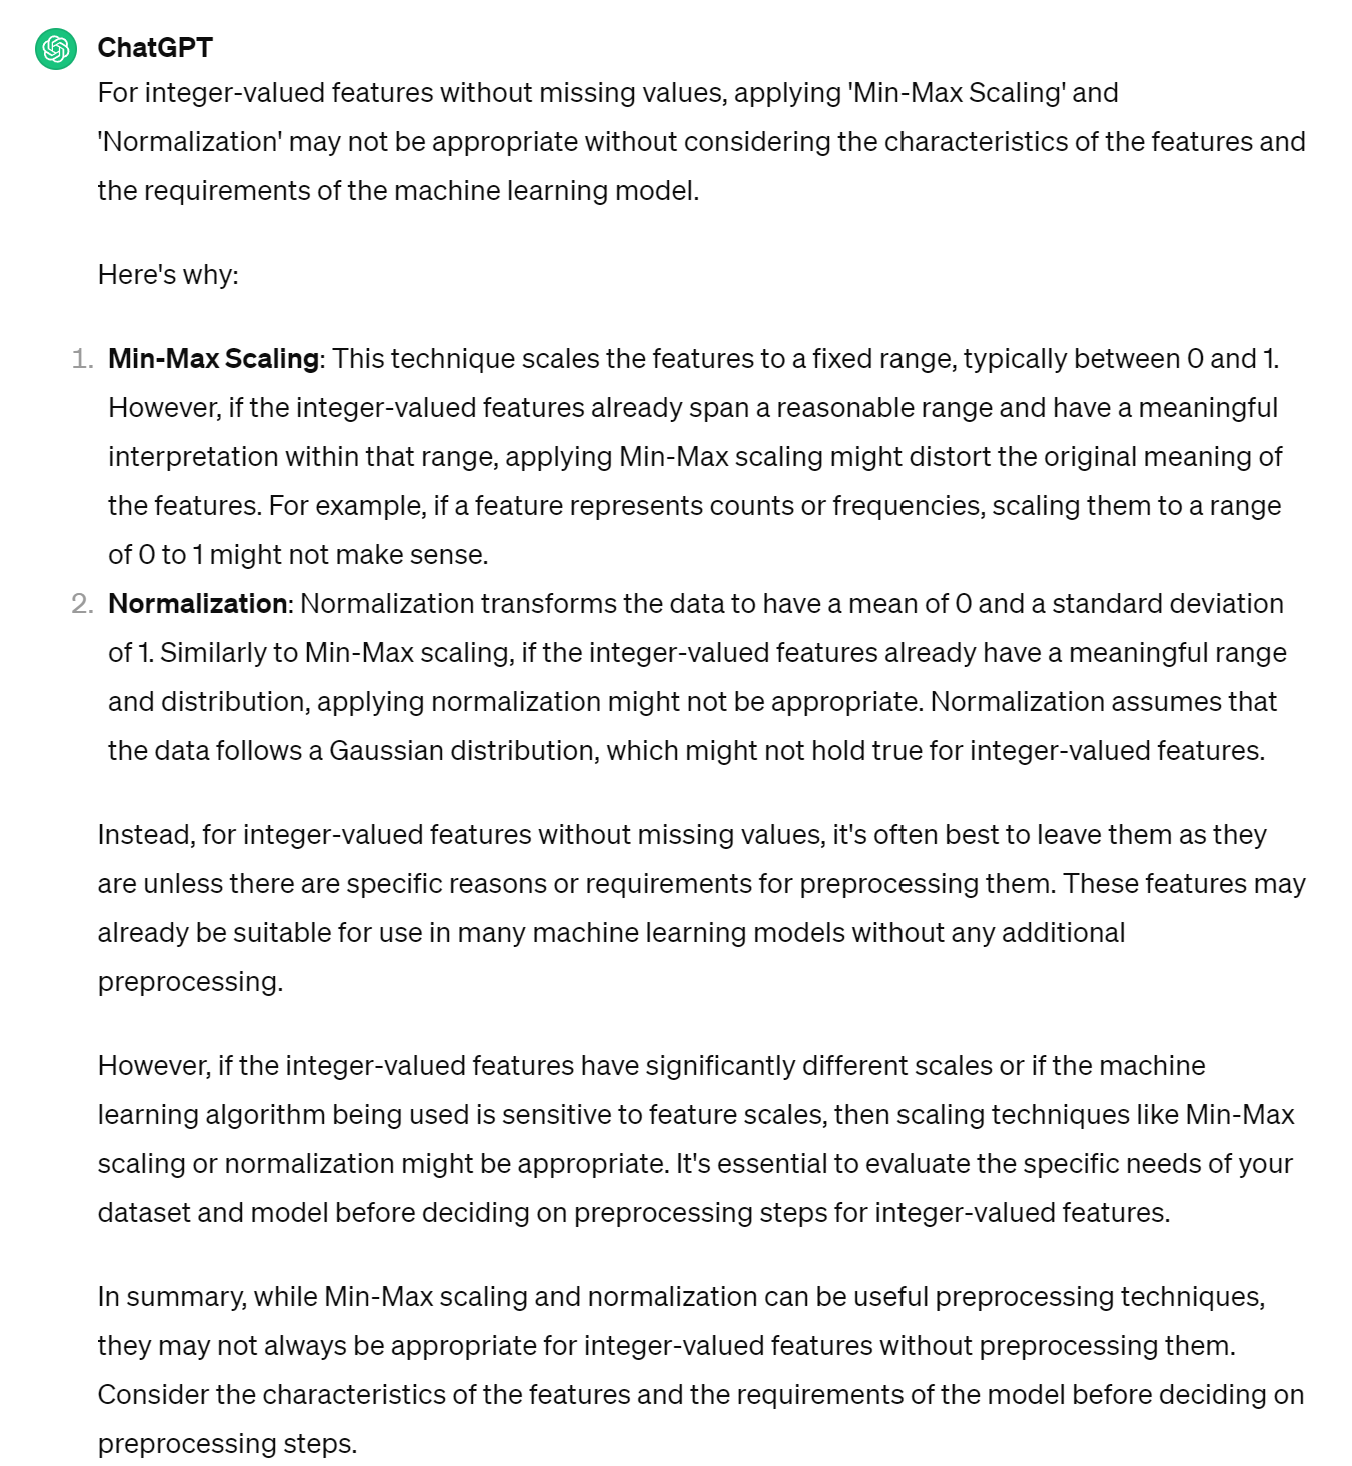

In [23]:
# target, feaure column 분리
test_col = test_df.columns
target_col = train_df.columns


for i in test_col:
    target_col = target_col.drop(i)

In [24]:
# 제출에 사용할 id column
passid = test_df['id']
train_df.drop(['id'], axis = 1, inplace= True)
test_df.drop(['id'], axis = 1, inplace= True)

In [25]:
# target_feature 와 분리
target = train_df[target_col]
train_df = train_df.drop(target_col, axis = 1)

In [26]:
train_df

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0.294550,0.294824,0.067269,0.067269,16,8,5,0.000175,113,140,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.159826,-0.5000,0.452806,0.1417
1,0.387912,0.388747,0.054102,0.054102,433,20,54,0.003808,70,111,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,0.357342,0.7419,0.324454,0.9491
2,0.022616,0.104365,0.156912,0.156915,11388,705,420,0.107163,29,141,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,0.436844,-0.0105,0.417205,1.0000
3,0.377110,0.377979,0.229361,0.229361,210,16,29,0.000255,114,134,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,0.303724,0.6667,0.440321,0.4025
4,0.643550,0.647351,0.046050,0.046052,521,72,67,0.004131,82,111,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,0.382754,0.9158,0.349789,0.9998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,0.364154,0.365066,0.010460,0.010460,17,4,4,0.000168,122,140,...,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.139138,-0.1429,0.458950,0.2901
19215,0.353503,0.356090,0.174952,0.174952,231,17,26,0.002317,104,133,...,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,0.300719,0.7222,0.415261,0.5378
19216,0.003513,0.015675,0.114266,0.114270,780,114,98,0.006095,41,94,...,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,0.380791,0.7719,0.261644,0.9997
19217,0.005265,0.008159,0.123508,0.123508,126,13,26,0.001255,88,132,...,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,0.300719,0.9610,0.407754,0.3509


In [27]:
# correlation
corr_df = pd.concat([train_df, target], axis = 1)

corr_test = corr_df.corr()
corr_test_target = abs(corr_test[target.columns])
corr_test_target.drop(corr_test_target.loc[target.columns], axis =0, inplace=True)

target_list = {}
for idx in target.columns:
    target_list[idx] = corr_test_target[idx].sort_values(ascending=False)
    print(f'================\n{idx}\n================\n',target_list[idx][:10])

Pastry
 Orientation_Index       0.261302
Outside_Global_Index    0.223768
Edges_Y_Index           0.201774
Log_X_Index             0.177303
Length_of_Conveyer      0.158670
Square_Index            0.150458
Outside_X_Index         0.139184
Empty_Index             0.133623
X_Minimum               0.113297
Luminosity_Index        0.106852
Name: Pastry, dtype: float64
Z_Scratch
 TypeOfSteel_A300         0.190070
TypeOfSteel_A400         0.189486
Length_of_Conveyer       0.168217
X_Maximum                0.136835
X_Minimum                0.111208
Outside_X_Index          0.087028
Empty_Index              0.085455
Edges_Index              0.083015
Pixels_Areas             0.081567
Maximum_of_Luminosity    0.076961
Name: Z_Scratch, dtype: float64
K_Scatch
 Log_X_Index              0.782110
Outside_X_Index          0.778859
LogOfAreas               0.745533
Pixels_Areas             0.701014
Edges_Y_Index            0.678464
Sum_of_Luminosity        0.676273
X_Perimeter              0.675056
Y_

In [53]:
# 개발자가 만든 코드를 그대로 가져와 학습함
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

X_train, X_test, y_train, y_test = train_test_split(train_df, target, random_state= 42, test_size=0.2)

def train_xgboost(target):
    xgb = xgboost.XGBClassifier()
    xgb.fit(X_train, target)
    return xgb

def prediction_xgboost(target, model):  
    
    y_pred = model.predict(target)
    y_sub = model.predict_proba(test_df)[:, 1]
    #print(f'{idx}', accuracy_score(y_test, y_pred))
    
    #y_pred = xgb.predict(test_df)
    #y_pred = pd.DataFrame(y_pred)
    return y_pred, y_sub

def train_random(target):
    rf = RandomForestClassifier()
    rf.fit(X_train, target)
    return rf

def prediction_rf(target, model):
    y_pred = model.predict(target)
    y_sub = model.predict_proba(test_df)[:, 1]
    return y_pred, y_sub

def train_voting(target, rf_model, xg_model):
    vt = VotingClassifier(estimators=[("Random Forest",rf_model),
                                               ("XGBoost",xg_model)],
                                  voting = 'soft')
    vt.fit(X_train, target)
    return vt

def prediction_vt(target, model):
    y_pred = model.predict(target)
    y_sub = model.predict_proba(test_df)[:, 1]
    
    # print(f'{idx}', accuracy_score(y_test, y_pred))
    
    #y_pred = rf.predict(test_df)
    #y_pred = pd.DataFrame(y_pred)
    return y_pred, y_sub
   

In [54]:
sub = pd.DataFrame()
xgb_model = {}
rf_model = {}
vt_model = {}

for target_name in target_col:
    xgb = train_xgboost(y_train[target_name])
    xgb_model[target_name] = xgb
    rf = train_random(y_train[target_name])
    rf_model[target_name] = rf
    vt = train_voting(y_train[target_name], xgb, rf)
    vt_model[target_name] = vt
    
    pred_xgb, y_xgb = prediction_xgboost(X_test,xgb)
    pred_rf, y_rf = prediction_rf(X_test,rf)
    pred_vt, y_vt = prediction_vt(X_test, vt)
    
    print(f'xgb_score_{target_name}:', accuracy_score(y_test[target_name],pred_xgb))
    print(f'rf_score_{target_name}:', accuracy_score(y_test[target_name],pred_rf))
    print(f'vt_score_{target_name}:', accuracy_score(y_test[target_name],pred_vt))
    
    # voting ensemble 사용을 위한 코드
    
    pred_vt_sub, y_vt_sub = prediction_vt(test_df, vt)
    #print(f'{target_name}:',type(y_vt_sub),'\n',y_vt_sub)
    sub[target_name] = y_vt_sub

xgb_score_Pastry: 0.9250780437044746
rf_score_Pastry: 0.9222164412070759
vt_score_Pastry: 0.9274193548387096
xgb_score_Z_Scratch: 0.9508324661810614
rf_score_Z_Scratch: 0.9542143600416233
vt_score_Z_Scratch: 0.9534339229968782
xgb_score_K_Scatch: 0.9651404786680541
rf_score_K_Scatch: 0.9651404786680541
vt_score_K_Scatch: 0.9659209157127991
xgb_score_Stains: 0.981789802289282
rf_score_Stains: 0.981789802289282
vt_score_Stains: 0.9802289281997919
xgb_score_Dirtiness: 0.9781477627471384
rf_score_Dirtiness: 0.97840790842872
vt_score_Dirtiness: 0.9789281997918835
xgb_score_Bumps: 0.7674297606659729
rf_score_Bumps: 0.7747138397502601
vt_score_Bumps: 0.7767950052029137
xgb_score_Other_Faults: 0.6654526534859522
rf_score_Other_Faults: 0.6607700312174818
vt_score_Other_Faults: 0.6670135275754423


In [55]:
import joblib

joblib.dump(rf_model, './rf_gpt.pkl')
joblib.dump(xgb_model, './rf_xgb.pkl')
joblib.dump(vt_model, './rf_vt.pkl')

['./rf_vt.pkl']

In [56]:
# 실제 예측값 생성
# passid 있음
xgb_gpt = pd.DataFrame({'id':passid})
rf_gpt = pd.DataFrame({'id':passid})
vt_gpt = pd.DataFrame({'id':passid})

for target_name in target_col:
    y_sub = xgb_model[target_name].predict_proba(test_df)[:, 1]
    xgb_gpt[target_name] = y_sub
    
    y_sub = rf_model[target_name].predict_proba(test_df)[:, 1]
    rf_gpt[target_name] = y_sub
    
    y_sub = vt_model[target_name].predict_proba(test_df)[:, 1]
    vt_gpt[target_name] = y_sub

In [57]:
xgb_gpt.to_csv('xgb_gpt.csv', index=False)
# kaggle score : 0.8606
rf_gpt.to_csv('rf_gpt.csv', index=False)
# kaggle score : 0.8629
vt_gpt.to_csv('vt_gpt.csv', index=False)
# kaggle score : 0.8697

In [58]:
xgb_test = pd.DataFrame()
rf_test = pd.DataFrame()
vt_test = pd.DataFrame()

# roc-auc 곡선
for target_name in target_col:
    y_sub = xgb_model[target_name].predict_proba(X_test)[:, 1]
    xgb_test[target_name] = y_sub
    
    y_sub = rf_model[target_name].predict_proba(X_test)[:, 1]
    rf_test[target_name] = y_sub
    
    y_sub = vt_model[target_name].predict_proba(X_test)[:, 1]
    vt_test[target_name] = y_sub

In [59]:
from sklearn.metrics import roc_auc_score
sum_xgb = 0
sum_rf = 0
sum_vt = 0

for target_name in target_col:
    print(f'{target_name}')
    score_xgb = roc_auc_score(y_test[target_name], xgb_test[target_name], average=None)
    score_rf = roc_auc_score(y_test[target_name], rf_test[target_name], average=None)
    score_vt = roc_auc_score(y_test[target_name], vt_test[target_name], average=None)
    
    '''
    print("xgboost :", score_xgb)
    print("random forest :", score_rf)
    print("voting ensemble :", score_vt)
    '''
    
    sum_xgb += score_xgb
    sum_rf += score_rf
    sum_vt += score_vt
    
sum_xgb = sum_xgb/len(target_col)
sum_rf = sum_rf/len(target_col)
sum_vt = sum_vt/len(target_col)

print("Xgboost:", sum_xgb)
print("Random Forest:", sum_rf)
print("Voting Ensemble:", sum_vt)

Pastry
Z_Scratch
K_Scatch
Stains
Dirtiness
Bumps
Other_Faults
Xgboost: 0.8741130824443565
Random Forest: 0.871658846189991
Voting Ensemble: 0.8754938060143989


In [60]:
# hyper parameter tuning
'''
To answer the previous question, I want to conduct hyperparameter tuning for a Voting Ensemble using Random Forest, XGBoost, and the two classifiers mentioned. 
First, I will focus on tuning the hyperparameters of the Random Forest classifier. 
From the perspective of a data scientist or experienced ML engineer, 
Select the parameters and their ranges for tuning, explain the choice of hyperparameter tuning algorithm, and provide example code.
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the base Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_depth': randint(5, 30),        # Maximum depth of the trees
    'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider at each split
}

# Perform Randomized Search CV to find the best parameters
# using iteration function, tuning each model trained for one target out of seven targets
rf_model_tuning = {}
for idx in target_col:
    rf_model_tuning[idx] = RandomizedSearchCV(estimator=rf_model[idx], param_distributions=param_dist, n_iter=100,
                               cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc')
    
    # Fit the Randomized Search model
    rf_model_tuning[idx].fit(X_train, y_train[idx])
    
    # Print the best parameters and best score
    print("Best Parameters:", rf_model_tuning[idx].best_params_)
    print("Best AUC-ROC Score:", rf_model_tuning[idx].best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 11, 'n_estimators': 346}
Best AUC-ROC Score: 0.8602678738774069
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 448}
Best AUC-ROC Score: 0.9480474324188523
Fitting 3 folds for each of 100 candidates, totalling 300 fits



KeyboardInterrupt



In [ ]:
for idx in target_col:
    pred = rf_model_tuning[idx].predict(X_test)
    score = accuracy_score(y_test[idx], pred)
    print(f'{idx} score', score)

In [ ]:
'''
Next, I will proceed with hyperparameter tuning for the XGBoost classifier. 
From the perspective of a data scientist or experienced ML engineer, select the parameters and their ranges for tuning, 
explain the choice of hyperparameter tuning algorithm used, and provide example code with reasons for choosing the parameters and algorithm.
'''
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the base XGBoost classifier
# xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 500),     # Number of boosting rounds
    'max_depth': randint(3, 10),            # Maximum depth of a tree
    'learning_rate': uniform(0.01, 0.3),    # Step size shrinkage
    'subsample': [0.8, 0.9, 1.0],           # Fraction of samples used
    'colsample_bytree': [0.8, 0.9, 1.0],    # Fraction of features used
    'gamma': [0, 0.1, 0.2, 0.3],            # Minimum loss reduction
    'reg_alpha': [0, 0.1, 0.5, 1.0],        # L1 regularization
    'reg_lambda': [0, 0.1, 0.5, 1.0]         # L2 regularization
}

# Perform Randomized Search CV to find the best parameters
# using iteration function, tuning each model trained for one target out of seven targets
xgb_model_tuning = {}
for idx in target_col:
    xgb_model_tuning[idx] = RandomizedSearchCV(estimator=xgb_model[idx], param_distributions=param_dist, n_iter=100,
                                cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc')
    # Fit the Randomized Search model
    xgb_model_tuning[idx].fit(X_train, y_train[idx])
    
    # Print the best parameters and best score
    print(f'Best Parameters of {idx}:',  xgb_model_tuning[idx].best_params_)
    print(f'Best AUC-ROC Score of {idx}:',  xgb_model_tuning[idx].best_score_)


In [ ]:
for idx in target_col:
    pred = xgb_model_tuning[idx].predict(X_test)
    score = accuracy_score(y_test[idx], pred)
    print(f'{idx} score', score)

In [ ]:
print("Random Forest\n==================================")
for idx in target_col:
    print(f'{idx}:', rf_model_tuning[idx].best_params_)

print("XGBoost\n==================================")
for idx in target_col:
    print(f'{idx}:', xgb_model_tuning[idx].best_params_)
'''
Random Forest
==================================
Pastry: {'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 383}
Z_Scratch: {'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 16, 'n_estimators': 363}
K_Scatch: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 13, 'n_estimators': 444}
Stains: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 7, 'n_estimators': 448}
Dirtiness: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 5, 'n_estimators': 493}
Bumps: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 13, 'n_estimators': 444}
Other_Faults: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 5, 'n_estimators': 493}

XGBoost
==================================
Pastry: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.03708693101632249, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.9}
Z_Scratch: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.03708693101632249, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.9}
K_Scatch: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.03708693101632249, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.9}
Stains: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.03523204183449923, 'max_depth': 7, 'n_estimators': 267, 'reg_alpha': 0.1, 'reg_lambda': 0, 'subsample': 0.9}
Dirtiness: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.05442607898601997, 'max_depth': 3, 'n_estimators': 286, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.9}
Bumps: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.032860113879748944, 'max_depth': 8, 'n_estimators': 181, 'reg_alpha': 0.5, 'reg_lambda': 1.0, 'subsample': 0.8}
Other_Faults: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.03708693101632249, 'max_depth': 3, 'n_estimators': 300, 'reg_alpha': 1.0, 'reg_lambda': 0.5, 'subsample': 0.9}
'''

In [ ]:
'''
Next, I will proceed with hyperparameter tuning for the Voting Ensemble classifier using Random Forest and XGBoost.
From the perspective of a data scientist or experienced ML engineer, select the parameters and their ranges for tuning, 
explain the choice of hyperparameter tuning algorithm used, and provide example code with reasons for choosing the parameters and algorithm.
'''
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import randint, uniform

voting_clf = {}
vt_model_tuning = {}

for idx in target_col:
    # Define the base classifiers
    rf = RandomForestClassifier(random_state=42)
    xgb_model = xgb.XGBClassifier(random_state=42)

    # Define the parameter grids for Random Forest and XGBoost
    rf_param_dist = {
        'n_estimators': randint(100, 500),
        'max_depth': randint(3, 15),
        'min_samples_split': randint(2, 20),
        'min_samples_leaf': randint(1, 10),
        'max_features': ['sqrt', 'log2', None]
    }

    xgb_param_dist = {
        'n_estimators': randint(100, 500),
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.3),
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.1, 0.5, 1.0],
        'reg_lambda': [0, 0.1, 0.5, 1.0]
    }

    # Define the Voting Classifier with the tuned base classifiers
    voting_clf[idx] = VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(**rf_param_dist)),
        ('xgb', xgb.XGBClassifier(**xgb_param_dist))], voting='soft')

    # Perform Randomized Search CV to find the best parameters for the Voting Classifier
    param_distributions = {
        'rf__n_estimators': rf_param_dist['n_estimators'],
        'rf__max_depth': rf_param_dist['max_depth'],
        'rf__min_samples_split': rf_param_dist['min_samples_split'],
        'rf__min_samples_leaf': rf_param_dist['min_samples_leaf'],
        'rf__max_features': rf_param_dist['max_features'],
        'xgb__n_estimators': xgb_param_dist['n_estimators'],
        'xgb__max_depth': xgb_param_dist['max_depth'],
        'xgb__learning_rate': xgb_param_dist['learning_rate'],
        'xgb__subsample': xgb_param_dist['subsample'],
        'xgb__colsample_bytree': xgb_param_dist['colsample_bytree'],
        'xgb__gamma': xgb_param_dist['gamma'],
        'xgb__reg_alpha': xgb_param_dist['reg_alpha'],
        'xgb__reg_lambda': xgb_param_dist['reg_lambda']
    }

    voting_random = RandomizedSearchCV(estimator=voting_clf[idx], param_distributions=param_distributions,
                                       n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='roc_auc',error_score = 'raise')
    
    vt_model_tuning[idx] = voting_random
    
    # Fit the Randomized Search model
    vt_model_tuning[idx].fit(X_train, y_train[idx])
    
    # Print the best parameters and best score
    print(f'Best Parameters of {idx}:', voting_random.best_params_)
    print(f'Best AUC-ROC Score {idx}:', voting_random.best_score_)


In [ ]:
for idx in target_col:
    print(f'Best Parameters of {idx}:', vt_model_tuning[idx].best_params_)
'''
Best Parameters of Pastry: {'rf__max_depth': 7, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 5, 'rf__n_estimators': 316, 'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0, 'xgb__learning_rate': 0.09461037177139194, 'xgb__max_depth': 4, 'xgb__n_estimators': 456, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 1.0, 'xgb__subsample': 1.0}
Best Parameters of Z_Scratch: {'rf__max_depth': 9, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 8, 'rf__min_samples_split': 8, 'rf__n_estimators': 221, 'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0.2, 'xgb__learning_rate': 0.027425083650459835, 'xgb__max_depth': 7, 'xgb__n_estimators': 199, 'xgb__reg_alpha': 1.0, 'xgb__reg_lambda': 1.0, 'xgb__subsample': 1.0}
Best Parameters of K_Scatch: {'rf__max_depth': 12, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 12, 'rf__n_estimators': 430, 'xgb__colsample_bytree': 0.9, 'xgb__gamma': 0.2, 'xgb__learning_rate': 0.05289750461585076, 'xgb__max_depth': 4, 'xgb__n_estimators': 352, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 0.5, 'xgb__subsample': 0.9}
Best Parameters of Stains: {'rf__max_depth': 10, 'rf__max_features': 'log2', 'rf__min_samples_leaf': 6, 'rf__min_samples_split': 3, 'rf__n_estimators': 226, 'xgb__colsample_bytree': 1.0, 'xgb__gamma': 0.1, 'xgb__learning_rate': 0.27321192157838664, 'xgb__max_depth': 3, 'xgb__n_estimators': 203, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 0, 'xgb__subsample': 1.0}
Best Parameters of Dirtiness: {'rf__max_depth': 12, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 12, 'rf__n_estimators': 430, 'xgb__colsample_bytree': 0.9, 'xgb__gamma': 0.2, 'xgb__learning_rate': 0.05289750461585076, 'xgb__max_depth': 4, 'xgb__n_estimators': 352, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 0.5, 'xgb__subsample': 0.9}
Best Parameters of Bumps: {'rf__max_depth': 9, 'rf__max_features': None, 'rf__min_samples_leaf': 9, 'rf__min_samples_split': 13, 'rf__n_estimators': 228, 'xgb__colsample_bytree': 0.9, 'xgb__gamma': 0.1, 'xgb__learning_rate': 0.05693111280132582, 'xgb__max_depth': 4, 'xgb__n_estimators': 195, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 0.1, 'xgb__subsample': 0.8}
Best Parameters of Other_Faults: {'rf__max_depth': 9, 'rf__max_features': None, 'rf__min_samples_leaf': 9, 'rf__min_samples_split': 13, 'rf__n_estimators': 228, 'xgb__colsample_bytree': 0.9, 'xgb__gamma': 0.1, 'xgb__learning_rate': 0.05693111280132582, 'xgb__max_depth': 4, 'xgb__n_estimators': 195, 'xgb__reg_alpha': 0.1, 'xgb__reg_lambda': 0.1, 'xgb__subsample': 0.8}
'''

In [ ]:
for idx in target_col:
    pred = vt_model_tuning[idx].predict(X_test)
    score = accuracy_score(y_test[idx],pred)
    print(f'{idx} Score:', score)

In [ ]:
# submission
xgb_gpt_tune = pd.DataFrame({'id':passid})
rf_gpt_tune = pd.DataFrame({'id':passid})
vt_gpt_tune = pd.DataFrame({'id':passid})

for target_name in target_col:
    y_sub = xgb_model_tuning[target_name].predict_proba(test_df)[:, 1]
    xgb_gpt_tune[target_name] = y_sub
    
    y_sub = rf_model_tuning[target_name].predict_proba(test_df)[:, 1]
    rf_gpt_tune[target_name] = y_sub
    
    y_sub = vt_model_tuning[target_name].predict_proba(test_df)[:, 1]
    vt_gpt_tune[target_name] = y_sub

In [ ]:
xgb_gpt_tune.to_csv('xgb_gpt_HP.csv', index=False)
# kaggle score : 0.8893
rf_gpt_tune.to_csv('rf_gpt_HP.csv', index=False)
# kaggle score : 0.8825
vt_gpt_tune.to_csv('vt_gpt_HP.csv', index=False)
# kaggle score : 0.8879

In [ ]:
## save tuned classifier
import joblib

joblib.dump(rf_model_tuning, "rf_model_tuning_gpt.pkl")
joblib.dump(xgb_model_tuning, "xgb_model_tuning_gpt.pkl")
joblib.dump(vt_model_tuning, "vt_model_tuning_gpt.pkl")

In [ ]:
## 튜닝된 분류기의 성능 평가
from sklearn.metrics import roc_auc_score

pred_xgb_tuned = pd.DataFrame()
pred_rf_tuned = pd.DataFrame()
pred_vt_tuned = pd.DataFrame()

for idx in target_col:
    pred_xgb_tuned[idx] = xgb_model_tuning[idx].predict_proba(X_test)[:, 1]
    pred_rf_tuned[idx] = rf_model_tuning[idx].predict_proba(X_test)[:, 1]
    pred_vt_tuned[idx] = vt_model_tuning[idx].predict_proba(X_test)[:, 1]

sum_xgb_tuned = 0
sum_rf_tuned = 0
sum_vt_tuned = 0

for target_name in target_col:
    score_xgb_tuned = roc_auc_score(y_test[target_name], pred_xgb_tuned[target_name], average=None)
    score_rf_tuned = roc_auc_score(y_test[target_name], pred_rf_tuned[target_name], average=None)
    score_vt_tuned = roc_auc_score(y_test[target_name], pred_vt_tuned[target_name], average=None)
    
    sum_xgb_tuned += score_xgb_tuned
    sum_rf_tuned += score_rf_tuned
    sum_vt_tuned += score_vt_tuned
    
sum_xgb_tuned = sum_xgb_tuned/len(target_col)
sum_rf_tuned = sum_rf_tuned/len(target_col)
sum_vt_tuned = sum_vt_tuned/len(target_col)

print("Xgboost:", sum_xgb_tuned)
print("Random Forest:", sum_rf_tuned)
print("Voting Ensemble:", sum_vt_tuned)

# Local Accuracy
# Random forest : 0.8828
# Xgboost: 0.8886
# Voting Ensemble: 0.8875

In [63]:
# pfi 확인 - random forest
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# target을 분할하여 반복적으로 pfi 계산
for idx in y_test:
    pfi = permutation_importance(rf_model[idx], X_test, y_test[idx], n_repeats = 30, random_state = 42)
    print(f'{idx} :')
    for i in pfi.importances_mean.argsort()[::-1]: #argsort = 인덱스 정렬
        print(f"{X_test.columns[i] : <8}"
              f"{pfi.importances_mean[i] : .3f}"    
              f"+/- {pfi.importances_std[i] : .3f}")
    print("\n")

Pastry :
Maximum_of_Luminosity 0.001+/-  0.000
Luminosity_Index 0.001+/-  0.001
Minimum_of_Luminosity 0.001+/-  0.001
Edges_Index 0.001+/-  0.001
Length_of_Conveyer 0.000+/-  0.000
Pixels_Areas 0.000+/-  0.000
Edges_Y_Index 0.000+/-  0.001
Edges_X_Index 0.000+/-  0.001
Y_Maximum 0.000+/-  0.001
X_Minimum 0.000+/-  0.000
TypeOfSteel_A400 0.000+/-  0.000
Y_Perimeter 0.000+/-  0.000
Square_Index 0.000+/-  0.000
Orientation_Index 0.000+/-  0.000
Steel_Plate_Thickness 0.000+/-  0.000
Outside_Global_Index 0.000+/-  0.000
SigmoidOfAreas 0.000+/-  0.000
Outside_X_Index 0.000+/-  0.001
TypeOfSteel_A300 0.000+/-  0.000
Sum_of_Luminosity 0.000+/-  0.001
Log_Y_Index 0.000+/-  0.000
LogOfAreas-0.000+/-  0.001
Y_Minimum-0.000+/-  0.000
Log_X_Index-0.000+/-  0.000
Empty_Index-0.000+/-  0.001
X_Perimeter-0.000+/-  0.000
X_Maximum-0.000+/-  0.000


Z_Scratch :
Length_of_Conveyer 0.011+/-  0.001
Steel_Plate_Thickness 0.010+/-  0.001
TypeOfSteel_A400 0.005+/-  0.001
TypeOfSteel_A300 0.003+/-  0.001
Empty

In [62]:
# pfi 확인 - xgboost
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# target을 분할하여 반복적으로 pfi 계산
for idx in y_test:
    pfi = permutation_importance(xgb_model[idx], X_test, y_test[idx], n_repeats = 30, random_state = 42)
    print(f'{idx} :')
    for i in pfi.importances_mean.argsort()[::-1]: #argsort = 인덱스 정렬
        print(f"{X_test.columns[i] : <8}"
              f"{pfi.importances_mean[i] : .3f}"    
              f"+/- {pfi.importances_std[i] : .3f}")
    print("\n")

Pastry :
Minimum_of_Luminosity 0.007+/-  0.002
Square_Index 0.005+/-  0.001
Y_Perimeter 0.004+/-  0.001
SigmoidOfAreas 0.004+/-  0.001
Length_of_Conveyer 0.004+/-  0.001
Y_Maximum 0.004+/-  0.002
Edges_Y_Index 0.004+/-  0.001
Y_Minimum 0.003+/-  0.001
Orientation_Index 0.003+/-  0.001
Outside_X_Index 0.003+/-  0.001
Edges_Index 0.003+/-  0.001
Sum_of_Luminosity 0.003+/-  0.001
LogOfAreas 0.002+/-  0.001
Luminosity_Index 0.002+/-  0.001
Steel_Plate_Thickness 0.002+/-  0.001
X_Perimeter 0.002+/-  0.001
Maximum_of_Luminosity 0.002+/-  0.001
Edges_X_Index 0.002+/-  0.001
X_Minimum 0.002+/-  0.001
Log_Y_Index 0.002+/-  0.001
Log_X_Index 0.002+/-  0.001
Pixels_Areas 0.001+/-  0.001
Outside_Global_Index 0.001+/-  0.001
Empty_Index 0.001+/-  0.001
TypeOfSteel_A300 0.001+/-  0.001
X_Maximum 0.001+/-  0.001
TypeOfSteel_A400 0.000+/-  0.000


Z_Scratch :
Steel_Plate_Thickness 0.014+/-  0.002
Length_of_Conveyer 0.013+/-  0.001
Luminosity_Index 0.003+/-  0.001
X_Maximum 0.002+/-  0.001
TypeOfSteel_

In [64]:
# pfi 확인 - voting classifier
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# target을 분할하여 반복적으로 pfi 계산
for idx in y_test:
    pfi = permutation_importance(vt_model[idx], X_test, y_test[idx], n_repeats = 30, random_state = 42)
    print(f'{idx} :')
    for i in pfi.importances_mean.argsort()[::-1]: #argsort = 인덱스 정렬
        print(f"{X_test.columns[i] : <8}"
              f"{pfi.importances_mean[i] : .3f}"    
              f"+/- {pfi.importances_std[i] : .3f}")
    print("\n")

Pastry :
Minimum_of_Luminosity 0.006+/-  0.001
Orientation_Index 0.005+/-  0.001
Length_of_Conveyer 0.004+/-  0.001
Edges_Y_Index 0.004+/-  0.001
Y_Perimeter 0.003+/-  0.001
Luminosity_Index 0.003+/-  0.001
X_Minimum 0.003+/-  0.001
Edges_Index 0.003+/-  0.001
Square_Index 0.003+/-  0.001
Outside_X_Index 0.003+/-  0.001
Sum_of_Luminosity 0.003+/-  0.001
Log_Y_Index 0.003+/-  0.001
Pixels_Areas 0.002+/-  0.001
Empty_Index 0.002+/-  0.001
Log_X_Index 0.002+/-  0.001
SigmoidOfAreas 0.002+/-  0.001
Y_Maximum 0.002+/-  0.001
X_Maximum 0.002+/-  0.001
Steel_Plate_Thickness 0.002+/-  0.001
Y_Minimum 0.002+/-  0.001
LogOfAreas 0.002+/-  0.001
X_Perimeter 0.002+/-  0.001
Outside_Global_Index 0.002+/-  0.001
Edges_X_Index 0.001+/-  0.001
Maximum_of_Luminosity 0.001+/-  0.000
TypeOfSteel_A300 0.001+/-  0.001
TypeOfSteel_A400 0.000+/-  0.000


Z_Scratch :
Length_of_Conveyer 0.012+/-  0.001
Steel_Plate_Thickness 0.011+/-  0.002
Luminosity_Index 0.003+/-  0.001
X_Maximum 0.003+/-  0.001
Maximum_of_L

In [117]:
# 학습 결과값을 submission file로 저장 - xgboost
submission_xgb = pd.DataFrame(sub_xgb)

submission_xgb.insert(0,'id', sample['id'])
submission_xgb.to_csv('./submission_xgb_gpt.csv',index= False)
# kaggle score : 0.82232

# 학습 결과값을 submission file로 저장 - random forest
submission_rf = pd.DataFrame(sub_rf)

submission_rf.insert(0,'id', sample['id'])
submission_rf.to_csv('./submission_rf_gpt.csv',index= False)
# kaggle score : 0.83211

In [87]:
sub.to_csv('submission_vt_gpt.csv', index=False)
# kaggle score : 0.8357